In [1]:
using LinearAlgebra
using Plots
using DataFrames
using CSV

In [2]:
used_βs = 0:20
colors = theme_palette(:auto)
# DUMP_DIR = joinpath(@__DIR__, "..", "dump", "cartpole-l2gain-beta1-beta8")
DUMP_DIR = joinpath(@__DIR__, "..", "dump", "cartpole-l2gain")

"/home/antonxue/stuff/nn-sdp/notebooks/../dump/cartpole-l2gain"

In [23]:
function loadDataFrame(t, method)
    if method == :deepsdpdual; mstr = "deepsdp__dual"
    elseif method == :chordal; mstr = "chordal__single_decomp"
    elseif method == :chordal2; mstr = "chordal__double_decomp"
    else error("Unsupported method: $(method)") 
    end
    
#     filepath = joinpath(DUMP_DIR, "cartw40_step$(t)_$(mstr).csv")
    filepath = joinpath(DUMP_DIR, "cartw40_t$(t)_$(mstr).csv")
    return CSV.File(filepath)
end

step1_df = loadDataFrame(1, :chordal2)
step2_df = loadDataFrame(2, :chordal2)
step3_df = loadDataFrame(3, :chordal2)

step1_gains = sqrt.(step1_df[:l2gain_squared])
step2_gains = sqrt.(step2_df[:l2gain_squared])
step3_gains = sqrt.(step3_df[:l2gain_squared])
;

In [24]:
# [step1_gains step2_gains step3_gains step4_gains]
[step1_gains step2_gains step3_gains]

21×3 Matrix{Float64}:
 1.18165  1.23685  1.3185
 1.17992  1.23559  1.31674
 1.17891  1.23355  1.31597
 1.17803  1.23184  1.31539
 1.17645  1.23156  1.31492
 1.17548  1.23128  1.31465
 1.17417  1.23068  1.31451
 1.17382  1.23053  1.31472
 1.17197  1.2304   1.31458
 1.16976  1.23009  1.31457
 1.16757  1.22999  1.31454
 1.16414  1.22974  1.31452
 1.16307  1.22963  1.31449
 1.16345  1.22924  1.31446
 1.16173  1.22935  1.31434
 1.16122  1.22897  1.31421
 1.16106  1.22889  1.3138
 1.15794  1.22762  1.31362
 1.15685  1.22719  1.31322
 1.1568   1.22675  1.31298
 1.15667  1.22595  1.31253

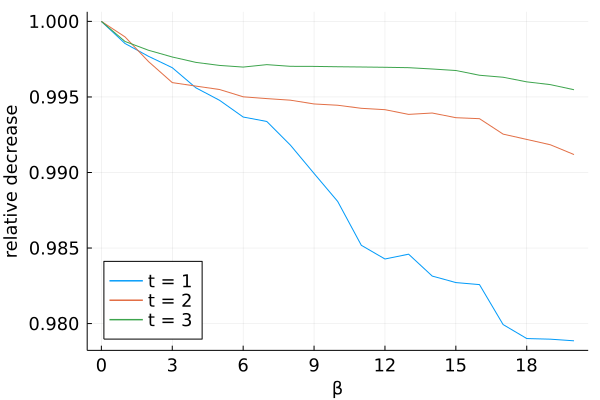

In [65]:
step1_rels = step1_gains / step1_gains[1]
step2_rels = step2_gains / step2_gains[1]
step3_rels = step3_gains / step3_gains[1]

plt = plot()
plt = plot!(plt, step1_rels, label="t = 1")
plt = plot!(plt, step2_rels, label="t = 2")
plt = plot!(plt, step3_rels, label="t = 3")
plt = plot!(plt, xlabel="β", ylabel="relative decrease", legend=:bottomleft)
plt = plot!(plt, xticks=(1:3:21, string.(0:3:20)))

fs = 12
plt = plot!(plt, xlabelfontsize=fs, ylabelfontsize=fs)
plt = plot!(plt, xtickfontsize=fs, ytickfontsize=fs)
plt = plot!(plt, legendfontsize=fs)

savefig(plt, joinpath(DUMP_DIR, "cartpole-l2gain.png"))
plt